# Логистическая регрессия. Метрики качества в задаче классификации. Работа с категориальными признаками.

## Задача классификации

Поговорим в общем о задаче классификации. 

Задача классификации на $N$ классов == построить отображение $a(\overline{x}) = C$, где $\overline{x} \in \mathbb{X}$ - элемент признакового пространства, $C \in \{1, ..., N\}$ - закодированный класс объекта.

Сейчас мы рассмотрим семейство линейных классификаторов на примере задачи бинарной классификации ($N = 2, \{0, 1\}$).

Мы уже знакомы с алгоритмом линейной регрессии: $a(\overline{x}) = \overline{w}^T\overline{x}$, то есть, пытаемся в некотором смысле "приблизить" искомую зависимость с помощью линейной функции.

В случае линейных классификаторов основная идея заключается в том, что признаковое пространство может быть разделено гиперплоскостями на несколько областей, в которых всем точкам присваивается значение какого-то одного класса.

Если выборк удается разделить "без ошибок", то выборка называется линейно разделимой.

**Пример для задачи бинарной классификации объектов двумерного пространства**

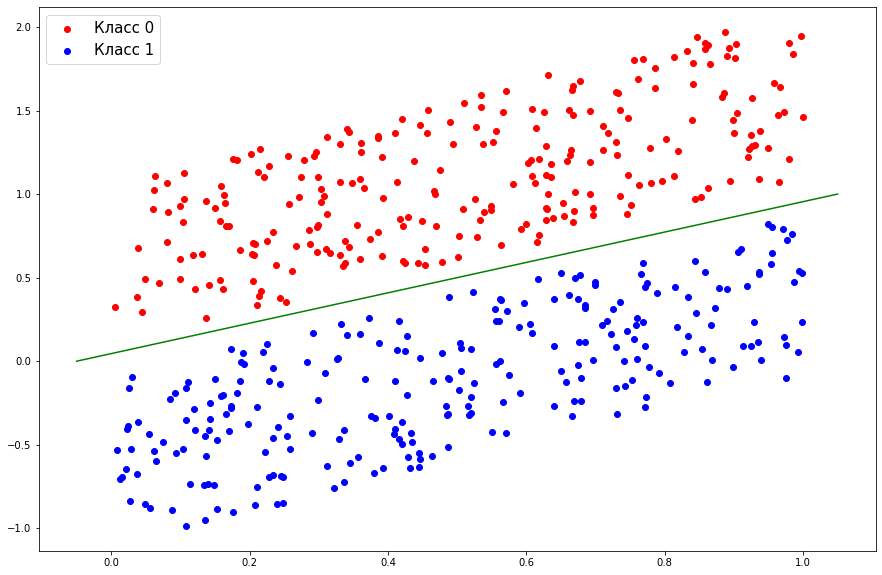

In [7]:
import numpy as np
import matplotlib.pyplot as plt

SIZE = 500
xs = np.random.rand(SIZE)
ys = []

for x in xs[:SIZE // 2]:
    ys.append(x + np.random.rand() + 0.1)
    
for x in xs[SIZE // 2:]:
    ys.append(x - np.random.rand() - 0.1)

plt.figure(figsize=(15, 10))
plt.scatter(xs[:SIZE // 2], ys[:SIZE // 2], color="red", label="Класс 0")
plt.scatter(xs[SIZE // 2:], ys[SIZE // 2:], color="blue", label="Класс 1")
plt.plot([-0.05, 1.05], [0, 1], color="green")
plt.legend(prop={"size":15})
plt.show()

Самый простой бинарный линейный классификатор получается на основе регрессии как: 

$a(\overline{x}) = sign(\overline{w}^T\overline{x})$, где $\overline{w}$ - векторо весов, $\overline{x}$ - вектор признаков, $sign(*)$ - функция, возвращающая знак числа $\{-1, +1\}$

*В чем тут проблема?*

## Логистическая регрессия

Пробовать "в лоб" приблизить зависимость $a(\overline{x}) = C = \overline{w}^T\overline{x}$ - идея не самая разумная, а простая функция знака имеет ряд проблем (в последующих лекциях мы рассмотрим возможные решения). 

Что делать? Попробуем зайти с другого конца - придумать такое преобразование целевой переменной из дискретного пространства в непрерывную ось, чтобы в дальнейшем мы смогли каким-нибудь разумным способом "вернуться" в исходное дискретное пространство.

Одним из разумных способов перевести дискретное пространство в непрерывное - это использовать вероятности.

Вернемся к задаче бинарной классификации. Попробуем предсказать вероятность принадлежности объекта $\overline{x}$ классу "1" как:

$p_{+} = \mathbb{P}\left(y = 1 | \overline{x}, \overline{w}\right)$


Тезисно:
1. Хотим прогнозировать вероятность 
2. Умеем строить прогноз с помощью линейной функции: $\overline{w}^T\overline{x}$. 

=> Надо преобразовать значение $\overline{w}^T\overline{x} \in \mathbb{R}$ в вероятность, пределы которой: $[0, 1]$. 

=> Соответственно, нужна некоторая (желательно, дифференцируемая) функция: $f: \mathbb{R} \rightarrow [0,1]$ 

Для начала, построим обратимую функцию из $[0, 1]$ в $\mathbb{R}$:
* $p_{+} \in [0, 1]$ - вероятность принадлежности объекта классу "1". 
* $r_{+} = \frac{p_{+}}{1 - p_{+}} \in [0, +\infty]$ - отношение вероятностей.
* Вероятность и отношение шансов содержат одинаковую информацию, так как существует однозначное соответствие между $r_{+}$ и $p_{+}$.
* Прологарифмируем и получим $log\left(r_{+}\right) \in \mathbb{R}$. 

Таким образом, получили отображение $f^{-1}(p_{+}) = log\left(\frac{p_{+}}{1 - p_{+}}\right): [0, 1] \rightarrow \mathbb{R}$. 

Эту функцию мы и будем апроксимировать с помощью линейной функции: $\overline{w}^T\overline{x} = f^{-1}(p_{+})$.

При этом несложно построить обратное отображение: 
$$
p_{+} = \frac{\exp(\overline{w}^T\overline{x})}{1 + \exp(\overline{w}^T\overline{x})} = \frac{1}{1 + \exp(-\overline{w}^T\overline{x})} = \sigma(\overline{w}^T\overline{x})
$$

Полученная функция $\sigma(z) = \frac{1}{1 + \exp(-z)}$ называетя сигмоидой.

Предположим, что мы обучили веса $\overline{w}$ модели логистической регрессии.
Тогда прогноз строится следующим образом:
* Вычислить значение $\overline{w}^T\overline{x} = log\left(r_{+}\right)$.
* Вычислить $p_{+}$: $$p_{+} = \sigma\left(\overline{w}^T\overline{x}\right)$$


Далее: а как нам обучить модель (настроить вектор $\overline{w}$)? 

Будем настраивать модель, максимизируя правдоподобие, то есть:
* $p_{+}(\overline{x_i}) = \mathbb{P}\left(y_i = 1 | \overline{x_i}, \overline{w}\right) = \sigma\left(\overline{w}^T\overline{x}\right)$
* $p_{-}(\overline{x_i}) = \mathbb{P}\left(y_i = -1 | \overline{x_i}, \overline{w}\right) = 1 - \sigma\left(\overline{w}^T\overline{x}\right) = \sigma\left(-\overline{w}^T\overline{x}\right)$

=> $\mathbb{P}\left(y = y_i | \overline{x_i}, \overline{w}\right) = \sigma\left(y_i\overline{w}^T\overline{x}\right)$

Далее, пусть есть матрица объектов-признаков $X$ и вектор целевых значений $\overline{y}$. Тогда (тут используется предположение, что объекты независимы):
$$\mathbb{P}\left(\overline{y} | X, \overline{w}\right) = \prod_{i=1}^{l} \mathbb{P}\left(y = y_i | \overline{x_i}, \overline{w}\right)$$
$l$ - число строк в матрице (размер выборки).
Соответственно, логарифмируем (чтобы преобразовать в сумму):
$$log\left(\mathbb{P}\left(\overline{y} | X, \overline{w}\right)\right) = log\left(\prod_{i=1}^{l} \sigma\left(y_i\overline{w}^T\overline{x_i}\right)\right) = \sum_{i=1}^{l}log\left(\sigma\left(y_i\overline{w}^T\overline{x_i}\right)\right) = \sum_{i=1}^{l}log\left(\frac{1}{1 + exp(-y_i\overline{w}^T\overline{x_i})}\right) = -\sum_{i=1}^{l}log\left(1 + exp(-y_i\overline{w}^T\overline{x_i})\right) = -\mathcal{L}\left(X, \overline{y}, \overline{w}\right)$$

$\mathcal{L}\left(X, \overline{y}, \overline{w}\right)$ - логистическая функция потерь.

Далее, нам нужно максимизировать прадоподобие по вектору $\overline{w}$ == минимизировать логистическую функцию потерь. На прошлых лекциях вам рассказывали про один из методов оптимизации - градиентный спуск.


**NB** На прошлом занятие вам рассказали про регуляризацию. В чем может быть проблема с классификацией?

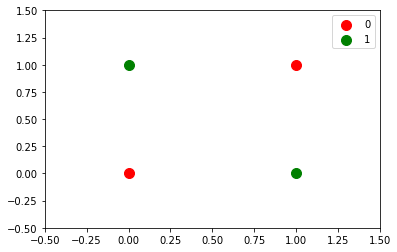

In [54]:
import matplotlib.pyplot as plt

plt.scatter([0, 1], [0, 1], s=100, color="red", label="0")
plt.scatter([0, 1], [1, 0], s=100, color="green", label="1")
plt.legend()
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()

## Метрики задачи классификации. Важность выбора метрики.

Для любой задачи машинного обучения важен фактор метрики. Метрика определяет количественную меру для задачи, которую можно использовать для выбора и сравнения алгоритмов.

Также метрика определяет некоторые качественные факторы задачи. Например, важность баланса классов, взвешивание классов и т. д.

Самой простейшей метрикой в задаче классификации является:
* Accuracy (Mean Consequential Error) - $\frac{1}{l}\sum_{i=1}^{l}\mathbb{1}\left[y^{true}_i = y^{pred}_i\right] \in [0, 1]$

Это индикаторная метрика или точность - доля правильных ответов. У нее есть особенность - она не учитывает дисбаланс классов, то есть если мы имеем класс 95% объектов нулевого класса и только 5% объектов единичного класса, то константное 0 дает уже долю правильных ответов 0.95


Далее рассмотрим более сложный объект - **Confusion matrix**, на котором основывается также целый ряд метрик:

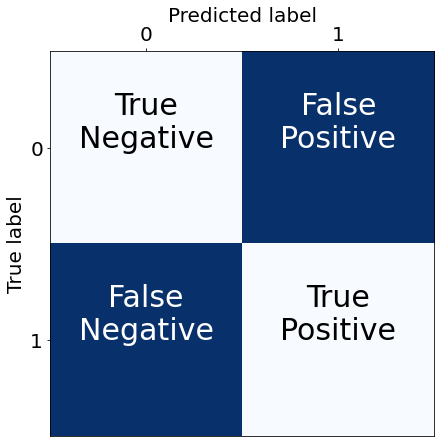

In [11]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          cmap=None,):
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow([[75, 80],[80, 75]], interpolation='nearest', cmap=cmap)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize=20)
        plt.yticks(tick_marks, target_names, fontsize=20)


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == j:
            plt.text(j, i, "{}".format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=30,
                     color="black")
        else:
            plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 fontsize=30,
                 color="white")


    plt.tight_layout()
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top() 
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()
    
plot_confusion_matrix(cm=np.array([[ "True\nNegative",  "False\nPositive"],
                                   [  "False\nNegative",  "True\nPositive"]]), 
                      target_names=['0', '1'],)

* False Positive = ошибка первого рода - пример: __не знаешь предмет, но сдал__
* False Negative = ошибка второго рода - пример: __знаешь предмет, но не сдал__

<img src="errors.png">

Как строить Confusion matrix?
Пусть у нас есть следующее:
* Метки объектов:      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
* Предсказанные метки: [0, 1, 1, 1, 0, 0, 1, 1, 1, 1]

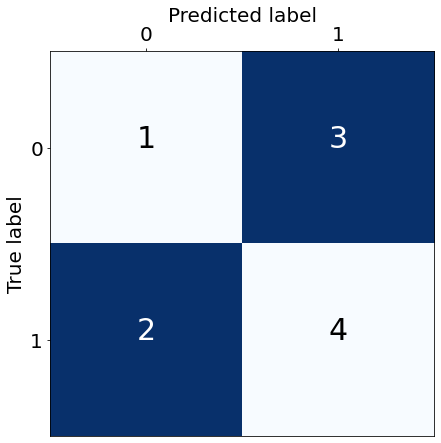

In [12]:
# [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
# [0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
plot_confusion_matrix(cm=np.array([[ 1, 3],
                                   [ 2, 4]]), 
                      target_names=['0', '1'])

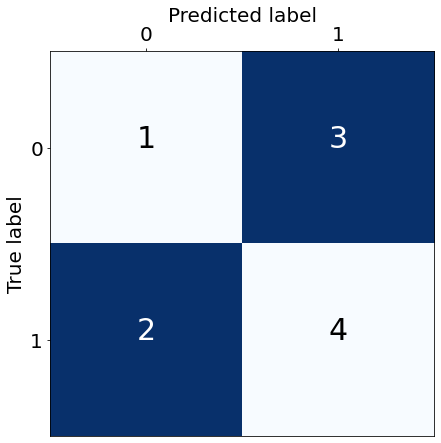

In [13]:
true = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
pred = np.array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

mask_0 = (true == 0)
mask_1 = (true == 1)

tn = (true[mask_0] == pred[mask_0]).sum()
fp = (true[mask_0] != pred[mask_0]).sum()
fn = (true[mask_1] != pred[mask_1]).sum()
tp = (true[mask_1] == pred[mask_1]).sum()

plot_confusion_matrix(cm=np.array([[ tn, fp],
                                   [ fn, tp]]), 
                      target_names=['0', '1'],)

Общие обозначения:
* True Negative = TN
* False Positive = FP
* False Negative = FN
* True Positive = TP

Как выразить Accuracy в терминах [TN, FP, FN, TP]?

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Рассмотрим еще несколько метрик на основе показателей Confusion Matrix - [TN, FP, FN, TP]:
* $Recall = True Positive Rate = TPR = \frac{TP}{TP + FN}, Recall = \frac{TP}{\text{*сколько истинных "1"*}}$
* $Precision = \frac{TP}{TP + FP}, Precision = \frac{TP}{\text{*сколько предсказано "1"*}}$
* $False Positive Rate = FPR = \frac{FP}{FP + TN}, FPR = \frac{FP}{\text{*сколько истинных "0"*}}$


* $\large{F_{\beta} = (1 + \beta^2)\frac{Precision * Recall}{Recall + \beta^2 Precision}}$
* $ \large{F_1 = \frac{2 Precision * Recall}{Recall + Precision} = \frac{2TP}{2TP + FP + FN}}$

$$
s(a,b) = \frac{2}{\frac{1}{a} + \frac{1}{b}}, \\
s(a,b, \alpha) = \frac{2}{\alpha\frac{1}{a} + (1-\alpha)\frac{1}{b}}
$$

Далее, пусть наш алгоритм выдает вероятность принадлежности классу 1 (как в случае лог. регрессии):
$$ y \in \{0, 1\}, a \in [0, 1]$$

Тогда можно рассмотреть ещё несколько метрик:

* $LOGLOSS = -\frac{1}{l} \sum_{i=1}^{l} \left(y_i log\left(a_i\right) + (1 - y_i) log\left(1 - a_i\right)\right)$ - Чему равно оптимальное решение в классе констант?



* $AUC\_ROC = \LARGE{\frac{\sum_{i=1}^{l} \sum_{j=1}^{l} \mathbb{1}\left[y_i < y_j\right] \mathbb{1}\left[a_i < a_j\right]}{\sum_{i=1}^{l} \sum_{j=1}^{l} \mathbb{1}\left[y_i < y_j\right]}}$ - количество правильно отсортированных пар. AUC - area under curve, ROC - receiver operating characteristic.

Поговорим про AUC. Судя из названия - это площадь под какой-то кривой. Но, помимо самой площади под кривой, сам ее вид может о многом сказать. На примере ниже расскажу план построения ROC-кривой.

<img src="auc_roc.png">

Источник: лекции А. Г. Дьяконова по курсу "Прикладные задачи анализа данных" за 2017 год.

Применение AUC_ROC:
* в задачах, где не важны значения, важен порядок
* можно использовать для оценки признаков

В чем минусы:
* «завышает» качество
* оценивает регрессию, а не конкретный классификатор  (!!!)
* сложно объяснить заказчику

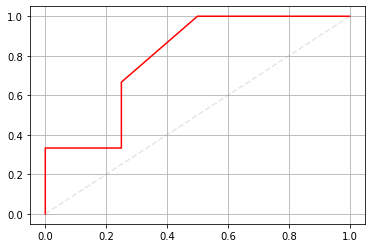

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

pred = [0.5, 0.1, 0.2, 0.6, 0.2, 0.3, 0.0]
true = [  0,   0,   0,   1,   1,   1,   0]
fpr, tpr, _ = roc_curve(true, pred)
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], '--', color="gray", alpha=0.2)
plt.grid()
plt.show()

## Категориальные признаки. Работа с категориальными признаками.

Категориальные признаки - признаки, у которых имеет смысл лишь операция сравнения.

Примеры:
* Профессия
* Должность
* Идентификационный номер
* Класс магазина

Где встречаются в прикладных задачах:
* Рекомендательные системы:
  * ID юзера
  * Браузер
  * Девайс
* Биологические исследования:
  * Коды белков
* Медицина:
  * Область на теле
  
Часто встречающиеся особенности:
* "Подозрительный" тип данных (к примеру, строки)
* Мало уникальных значений

Так как многие алгоритмы машинного обучения "работают" с признаками как с некоторой непрерывной величиной, возникает вопрос: "А как работать с категориями?"

=> Закодируем категории в числа!

* OneHotEncoding - OHE (в sklearn - sklearn.preprocessing.OneHotEncoder, в pandas - pandas.get_dummies())

Пример:

In [15]:
from sklearn.preprocessing import OneHotEncoder

categories = np.array([[1, 1, 5, 5, 10, 10, 10, 5, 1, 10]]).T
dummy_features = OneHotEncoder(sparse=False).fit_transform(categories)
dummy_features

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [18]:
from sklearn.preprocessing import OneHotEncoder

categories = np.array([['a', 'b', 'a', 'c', 'd']]).T
dummy_features = OneHotEncoder(sparse=False).fit_transform(categories)
dummy_features

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [25]:
df_categories = pd.DataFrame({"cat1": [1, 1, 5, 5, 10, 10, 10, 5, 1, 10],
                              "cat2": ["a", "b", "d", "f", "e", "g", "a", "b", "c", "b"]})
pd.concat([pd.get_dummies(df_categories["cat1"]), pd.get_dummies(df_categories["cat2"])], axis=1)

,1,5,10,a,b,c,d,e,f,g
0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,1
6,0,0,1,1,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,0,0,0,0,1,0,0,0,0
9,0,0,1,0,1,0,0,0,0,0


In [19]:
import pandas as pd

df_categories = pd.DataFrame({"cat": [1, 1, 5, 5, 10, 10, 10, 5, 1, 10]})
pd.get_dummies(df_categories["cat"])

,5,10
0,0,0
1,0,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,1,0
8,0,0
9,0,1


In [180]:
import pandas as pd

df_categories = pd.DataFrame({"cat": ['a', 'b', 'a', 'c']})
pd.get_dummies(df_categories["cat"])

,a,b,c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


**В чем проблема OHE?**


Рассмотрим ещё вид кодирования - **Label Encoding**

In [67]:
from sklearn.preprocessing import LabelEncoder

categories = np.array([[1.5, 1.7, 1.7, 1.3, 1.3]]).T
labels = LabelEncoder().fit_transform(categories)
labels

/home/sggpls/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 2, 0, 0])

In [68]:
from sklearn.preprocessing import LabelEncoder

categories = np.array([['a', 'b', 'a', 'c']]).T
labels = LabelEncoder().fit_transform(categories)
labels

array([0, 1, 0, 2])

Ещё один вариант кодирования - по количеству элементов данной категории в обучающей выборке.

In [70]:
import pandas as pd

df_categories = pd.DataFrame({"cat": [1, 1, 5, 5, 10, 10, 10, 5, 1, 10]})
df_categories["cat_counter"] = df_categories["cat"].map(df_categories.groupby("cat").size())
df_categories

,cat,cat_counter
0,1,3
1,1,3
2,5,3
3,5,3
4,10,4
5,10,4
6,10,4
7,5,3
8,1,3
9,10,4


Далее, как ещё можно использовать категориальные признаки?

На самом деле, использование категориальных признаков - это отдельное искусство.

Часто категориальные признаки используют в качестве когорт для генерации новых вещественных признаков.
Можно группировать объекты по когортам и выдавать какие-то статистики от когорт (к примеру, max, min, mean, std и прочее)

Рассмотрим библиотеку category_encoders на Python.

In [14]:
!pip3 install category_encoders

     |████████████████████████████████| 80 kB 1.6 MB/s eta 0:00:011


```
import category_encoders as ce

encoder = ce.BackwardDifferenceEncoder(cols=[...])
encoder = ce.BaseNEncoder(cols=[...])
encoder = ce.BinaryEncoder(cols=[...])
encoder = ce.CatBoostEncoder(cols=[...])
encoder = ce.CountEncoder(cols=[...])
encoder = ce.GLMMEncoder(cols=[...])
encoder = ce.HashingEncoder(cols=[...])
encoder = ce.HelmertEncoder(cols=[...])
encoder = ce.JamesSteinEncoder(cols=[...])
encoder = ce.LeaveOneOutEncoder(cols=[...])
encoder = ce.MEstimateEncoder(cols=[...])
encoder = ce.OneHotEncoder(cols=[...])
encoder = ce.OrdinalEncoder(cols=[...])
encoder = ce.SumEncoder(cols=[...])
encoder = ce.PolynomialEncoder(cols=[...])
encoder = ce.TargetEncoder(cols=[...])
encoder = ce.WOEEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

Некоторые виды кодировок мы уже рассмотрели. Рассмотрим ещё несколько.

## Кодировки при помощи целевой переменной
Иногда полезно использовать целевую переменную для кодирования. Обозначим следующие понятия: 
* $y$ - общее число примеров; 
* $y_{+}$ - число примеров, отнесенных к «положительному» классу;
* $n$ - число примеров на уровне (один уровень - одинаковое значение категории);
* $n_{+}$ - число примеров уровня, отнесенных к положительному классу; 
* $\alpha$ - регуляризирующий параметр;
* $prior$ - среднее значение целевого показателя.

Рассмотрим несколько видов кодирования, которые используют целевую переменную:

* ```Target Encoder```. Переменная кодируется по формуле 
$$
x_k = prior * (1 - s) + s * \frac{n_{+}}{n}\text{, где } s = \frac{1}{1 + exp(\frac{-n - min\_samples\_leaf}{\alpha})}\text{, а } min\_samples\_leaf\text{ — параметр, минимальное количество объектов для учета категории.}
$$

* ```James-Stein Encoder```. Переменная кодируется по формуле:
$$
x_k =(1 - B) * \frac{n_{+} + prior*m}{n_{+} + m} + B*\frac{y_{+}}{y}\text{, где } B, m\text{ дополнительные гиперпараметры, регулирующие переобучение. } m \in [1...100].
$$

* ```M-estimate```. :
$$
x_k = \frac{n_{+}}{n} + B \frac{y_{+}}{y}. \text{По сути — упрощенный вариант ```Target Encoder```.}
$$

* ```Weight of Evidence (WOE)```. Переменная кодируется по формуле:
$$
x_k = ln\left(\frac{nominator}{denominator}\right)\text{, где } nominator = \frac{n_{+} + \alpha}{y_{+} + 2\alpha}, denominator = \frac{n - n_{+} + \alpha}{y - y_{+} + 2\alpha}.
$$
Кодировщик по сути производит упорядочивание в логарифмическом масштабе. Хорошо решает проблему стандартизации и группировки разреженных данных. Проблема — легко может переобучиться.